In [28]:
import importlib

import neuralOde_f
importlib.reload(neuralOde_f)
from neuralOde_f import *

import plot
importlib.reload(plot)
from plot import *

import numpy as np
import matplotlib.pyplot as plt
import math
from torch.autograd import Variable
import torch as tr
import torch.nn as nn

import random as rnd


In [128]:
_h_ = 0.05
_plot_ = False
_z_t_ = []
metods = ["Метод Эйлера (явный)", "Метод Эйлера-Коши (явный)", "Метод Рунге-Кутты 4-го порядка"]
mt = metods[0]

target.shape (101,)
param =  8320
tensor([[[0.00000]],

        [[0.40000]],

        [[0.80000]],

        [[1.20000]]], dtype=torch.float64)


100%|██████████| 500/500 [00:54<00:00,  9.17it/s]


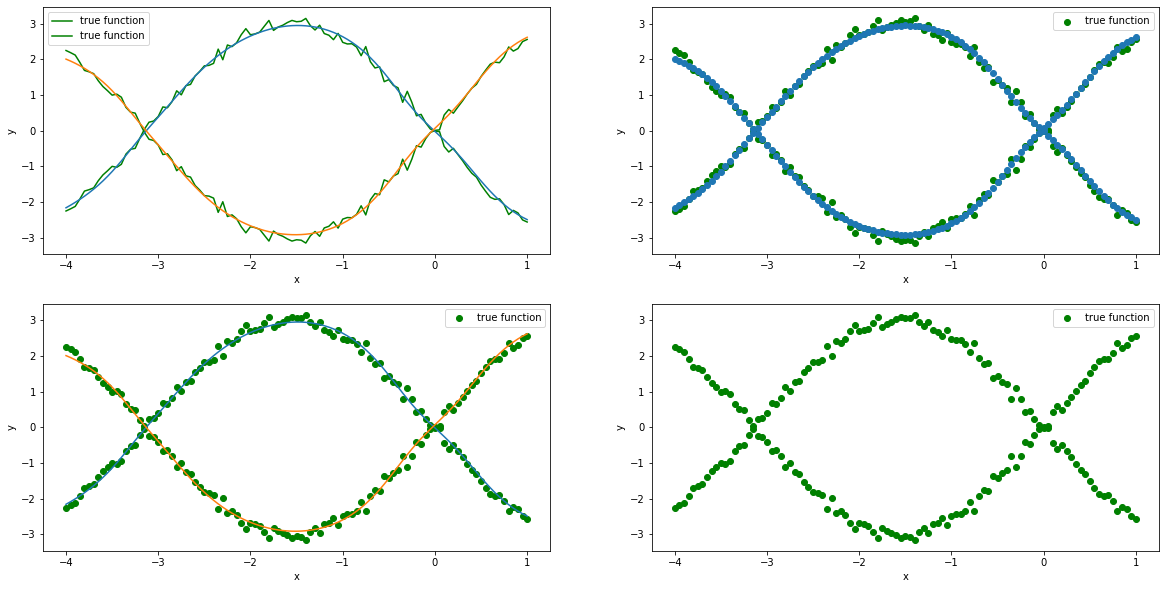

param =  8320
tensor([[[0.00000]],

        [[0.40000]],

        [[0.80000]],

        [[1.20000]]], dtype=torch.float64)


100%|██████████| 500/500 [02:10<00:00,  3.84it/s]


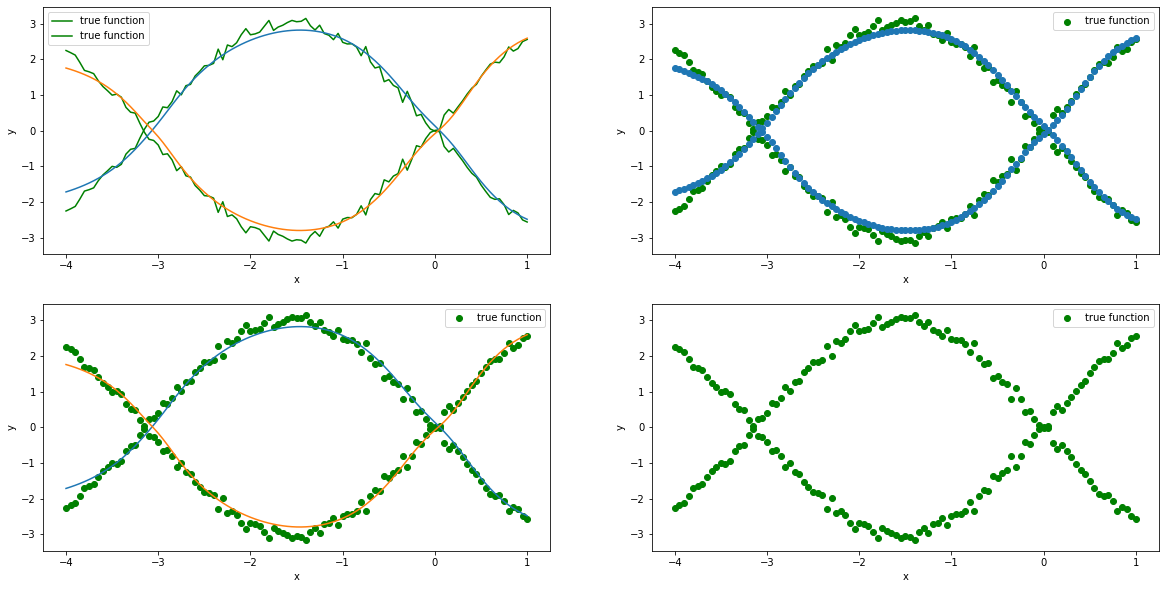

param =  8320
tensor([[[0.00000]],

        [[0.40000]],

        [[0.80000]],

        [[1.20000]]], dtype=torch.float64)


100%|██████████| 500/500 [03:09<00:00,  2.63it/s]


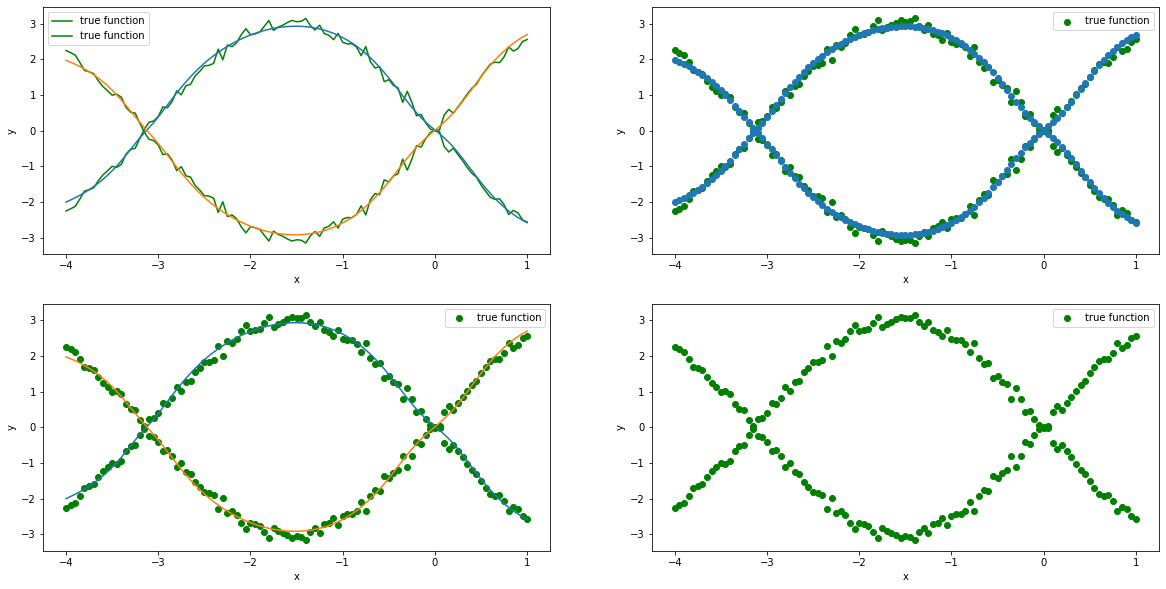

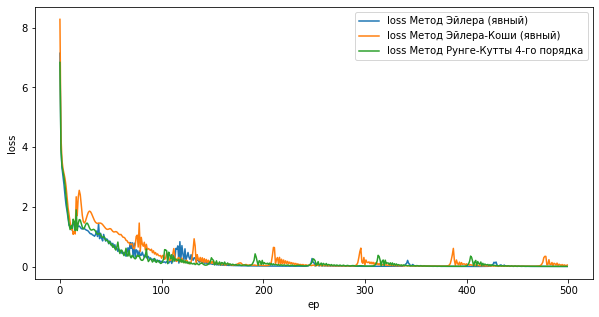

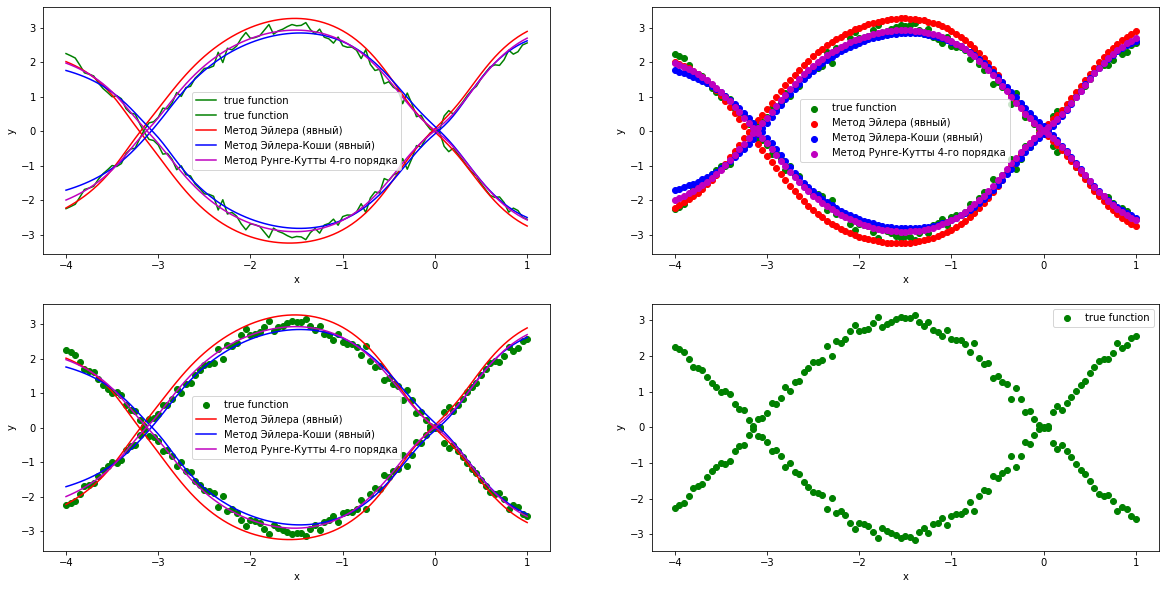

In [276]:
def convert(a):
    return np.hstack([a[:, None]])

def convert_to_tensor(a):
    return tr.from_numpy(a[:, :, None])

def make_batch(x_val, y_val, time, num):
    t0 = np.random.uniform(0, time[-1].item())
    diff = time[-1].item() - time[-2].item()
    t1 = t0 + np.random.uniform(1, diff * 20)
    
    indices = convert(np.arange(0, len(time), 1, dtype=int))
    t0t1_inds = indices[(time >= t0) & (time <= t1)]
    loc_indices = sorted(np.random.permutation(t0t1_inds)[:num])
    loc_x = x_val[:len(x_val)]
    loc_y = y_val[:len(x_val)]
    loc_times = convert_to_tensor(time)[:4]
    return loc_x, loc_y, loc_times

def run(x, y, t, model, optimizer = None, train=False):
    z0 = x
    zn = y
    

    if train:
        z_ = model(z0, t, return_whole_sequence=False)
        loss = tr.nn.functional.mse_loss(z_, zn)
        l = loss.cpu().item()

        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        return l
    else:
        z_ = model(z0, t, return_whole_sequence=False)
        return z_

def pred_approximation(x, noise_target, ep = 10, par = 16, t0 = 0., tn = 4., n_n = 4):
    epoch = ep 
    l1 = NeuralODE(Matrix_func(2, par))

    z0 = Variable(tr.Tensor([[0.6]]))
    n = 20
    time = convert(np.linspace(0.0, 40., len(x)))
    
    x_values = tr.tensor([[i, i] for i, j in zip(x, noise_target)]).type_as(z0)
    
    y_values = tr.tensor([[j, -j] for i, j in zip(x, noise_target)]).type_as(z0)

    optimizer = tr.optim.Adam(l1.parameters(), lr=0.01)
    
    loc_times = convert_to_tensor(time)[:4]
    print(loc_times)
    
    list_loss = []
    for i in tqdm(range(epoch)):
        x, y, t = make_batch(x_values, y_values, time, num=n)
        x_, y_, t_ = x, y, t

        l = [run(x_, y_, t_, l1, optimizer, train=True)]
        
        # if i % 100 == 0: plot_result(x_values, y_values, loc_times, l1, func_run = run)
        
        avr_loss = l
        list_loss += [avr_loss]
    
    plot_result(x_values, y_values, loc_times, l1, run)

    return x_values, y_values, loc_times, l1, run, list_loss


global metods, mt
l_z0 , l_time , l_l, l_values, l_run_din, l_list_loss = [], [], [], [], [], []

mtds = metods

x, target, y, data  = make_points(x0 = -4, xn = 1, h_x = 0.05, y = y3, shuffle = True, noise = True)

for i in mtds:
    mt = i  
    z0, time, l1, values, run_din, list_loss = pred_approximation(x, y, ep = 500)
    l_z0 += [z0]
    l_time += [time]
    l_l += [l1]
    l_values += [values]
    l_run_din += [run_din]
    l_list_loss += [list_loss]
    
plot_loss(l_list_loss, mtds)
plot_result1(l_z0, l_time, l_l, l_values, l_run_din, mtds)

In [290]:
def convert(a):
    return np.hstack([a[:, None]])

def convert_to_tensor(a):
    return tr.from_numpy(a[:, :, None])

def make_batch(x_val, y_val, time, num):
    t0 = np.random.uniform(0, time[-1].item())
    diff = time[-1].item() - time[-2].item()
    t1 = t0 + np.random.uniform(1, diff * 20)
    
    indices = convert(np.arange(0, len(time), 1, dtype=int))
    t0t1_inds = indices[(time >= t0) & (time <= t1)]
    loc_indices = sorted(np.random.permutation(t0t1_inds)[:num])
    loc_x = x_val[:len(x_val)]
    loc_y = y_val[:len(x_val)]
    loc_times = convert_to_tensor(time)[:4]
    return loc_x, loc_y, loc_times

def run(x, y, t, model, optimizer = None, train=False):
    z0 = x
    zn = y
    

    if train:
        z_ = model(z0, t, return_whole_sequence=False)
        loss = tr.nn.functional.mse_loss(z_, zn)
        l = loss.cpu().item()

        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        return l
    else:
        z_ = model(z0, t, return_whole_sequence=False)
        return z_

def pred_approximation(x, noise_target, ep = 10, par = 16, t0 = 0., tn = 4., n_n = 4):
    epoch = ep 
    l1 = NeuralODE(Matrix_func(2, par))

    z0 = Variable(tr.Tensor([[0.6]]))
    n = 20
    time = convert(np.linspace(0.0, 40., len(x)))
    
    x_values = tr.tensor([[i, i] for i, j in zip(x, noise_target)]).type_as(z0)
    
    y_values = tr.tensor([[j, -j] for i, j in zip(x, noise_target)]).type_as(z0)

    optimizer = tr.optim.Adam(l1.parameters(), lr=0.01)
    
    loc_times = convert_to_tensor(time)[:4]
    # print(loc_times)
    
    list_loss = []
    for i in range(epoch):
        x, y, t = make_batch(x_values, y_values, time, num=n)
        x_, y_, t_ = x, y, t

        l = [run(x_, y_, t_, l1, optimizer, train=True)]
        
        # if i % 100 == 0: plot_result(x_values, y_values, loc_times, l1, func_run = run)
        
        avr_loss = l
        list_loss += [avr_loss]
    
    # plot_result(x_values, y_values, loc_times, l1, run)

    return x_values, y_values, loc_times, l1, run, list_loss

x, target, y, data  = make_points(x0 = -4, xn = 1, h_x = 0.05, y = y3, shuffle = True, noise = True)
list_loss = []
list_times = []
global _h_, mt, metods
hh = np.arange(0.01, 1, 0.01)
for h in hh:
    mt = metods[0]
    _h_ = h  
    start = time.time()
    loss = pred_approximation(x, y, ep = 600)
    finish = time.time()
    list_loss += [loss[-1][0][0]]
    list_times += [finish - start]

    


target.shape (101,)
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param =  544
param

Text(0.5, 0, 'h')

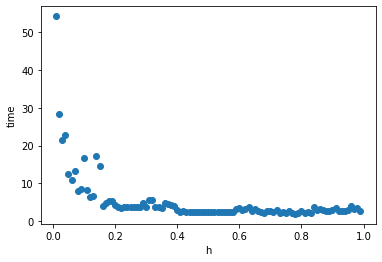

In [298]:
plt.scatter(hh, list_times)
plt.ylabel("time")
plt.xlabel("h")

In [2]:
_h_ = 0.05
_plot_ = False
_z_t_ = []
metods = ["Метод Эйлера (явный)", "Метод Эйлера-Коши (явный)", "Метод Рунге-Кутты 4-го порядка"]
mt = metods[0]

class Lin_ODEFunction(Function_for_ode):
    def __init__(self, W1):
        super(Lin_ODEFunction, self).__init__()
        self.lin = nn.Linear(2, 2, bias=False)
        self.lin.weight = nn.Parameter(W1)

    def forward(self, x, t):
        return tr.tanh(self.lin(x))
    
class FunctionExample(Lin_ODEFunction):
    def __init__(self):
        super(FunctionExample, self).__init__(tr.Tensor([[-0.1, 1.], [1., -0.1]]))


param =  8320


100%|██████████| 400/400 [00:15<00:00, 25.55it/s]


param =  8320


100%|██████████| 400/400 [00:30<00:00, 13.22it/s]


param =  8320


100%|██████████| 400/400 [01:00<00:00,  6.65it/s]


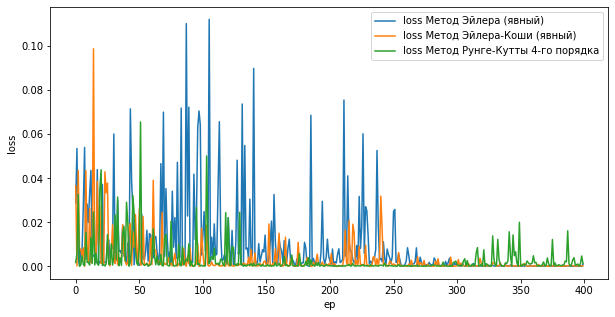

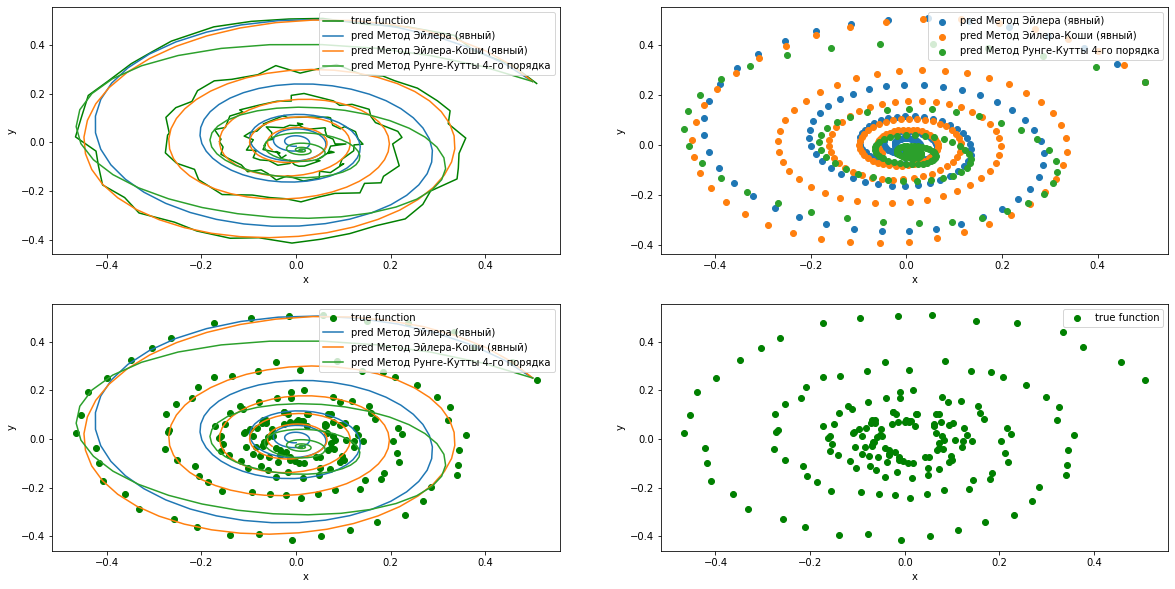

In [272]:
from plot import *
import plot
from file_1 import *
import importlib
import file_1

importlib.reload(file_1)
importlib.reload(plot)
importlib.reload(file_1)
importlib.reload(plot)

def f_x(x):
    return math.cos(2.5 * x**2 - 5 * x)

global r 
r = 10

def make_batch_din(val, time, num):
    t0 = np.random.uniform(0, time[-1].item())
    diff = time[-1].item() - time[-2].item()
    t1 = t0 + np.random.uniform(1, diff * 20)
    
    indices = convert(np.arange(0, len(time), 1, dtype=int))
    t0t1_inds = indices[(time >= t0) & (time <= t1)]
    loc_indices = sorted(np.random.permutation(t0t1_inds)[:num])
    loc_val = val[loc_indices]
    loc_times = convert_to_tensor(time)[loc_indices]
    return loc_val[0], loc_val, loc_times

def run_din(x, y, t, model, optimizer = None, scheduler = None, train=False):
    z0 = x
    zn = y
    
    if train:
        z_ = model(z0, t, return_whole_sequence=True)
        loss = tr.nn.functional.mse_loss(z_, zn.detach())
        l = loss.cpu().item()

        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        
        # scheduler.step()
        return l
    else:
        z_ = model(z0, t, return_whole_sequence=True)
        return z_

global fl

global yr
fl = True
yr = []

def pred_din(f_din, z0 = 0.5, ep = 10, par = 64, t0 = 0., tn = 29., n_n = 180):
    
    epoch = ep
    
    l1 = NeuralODE(Matrix_func(2, par))

    z0 = Variable(torch.Tensor([[z0, z0 / 2]]))
    
    n = n_n
    time = convert(np.linspace(t0, tn, n))
    
    values = f_din(z0, convert_to_tensor(time), return_whole_sequence=True).detach()
    global fl
    global yr  
    if fl == True:
        rrr = torch.randn_like(values) * 0.01
        yr = rrr
        fl = False
    else:
        rrr = yr
    values = values + rrr

    optimizer = tr.optim.Adam(l1.parameters(), lr=0.01)
    # scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, ep * 2, eta_min=5e-4)
    scheduler = 0
    
    list_loss = []
    for i in tqdm(range(epoch)):
        
        x_, y_, t_ = make_batch_din(values, time, 20)
        
        l = run_din(x_, y_, t_, l1, optimizer, scheduler, train=True)
        
        # if i % 100 == 0: plot_result_din(z0, time, l1, values, run_din)
        
        list_loss += [l]
    
    # plot_result_din(z0, time, l1, values, run_din)

    return z0, time, l1, values, run_din, list_loss

class Lin_ODEFunction(Function_for_ode):
    def __init__(self, W1):
        super(Lin_ODEFunction, self).__init__()
        self.lin = nn.Linear(2, 2, bias=False)
        self.lin.weight = nn.Parameter(W1)

    def forward(self, x, t):
        return self.lin(x)
    
class FunctionExample(Lin_ODEFunction):
    def __init__(self):
        a = -20
        # super(FunctionExample, self).__init__(tr.Tensor([[math.cos(a), math.sin(a)], [-math.sin(a), math.cos(a)]]))
        super(FunctionExample, self).__init__(tr.Tensor([[-0.1, -1.], [1, -0.1]]))

global metods
global mt
l_z0 = []
l_time = []
l_l = []
l_values = []
l_run_din = []
l_list_loss = []

mtds = metods

for i in mtds:
    mt = i  
    z0, time, l1, values, run_din, list_loss = pred_din(NeuralODE(SpiralFunctionExample()), ep = 400)
    l_z0 += [z0]
    l_time += [time]
    l_l += [l1]
    l_values += [values]
    l_run_din += [run_din]
    l_list_loss += [list_loss]
    
plot_loss(l_list_loss, mtds)
plot_result_din_list(l_z0, l_time, l_l, l_values, l_run_din, mtds)

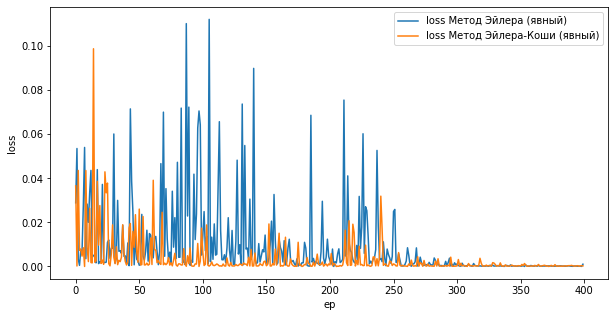

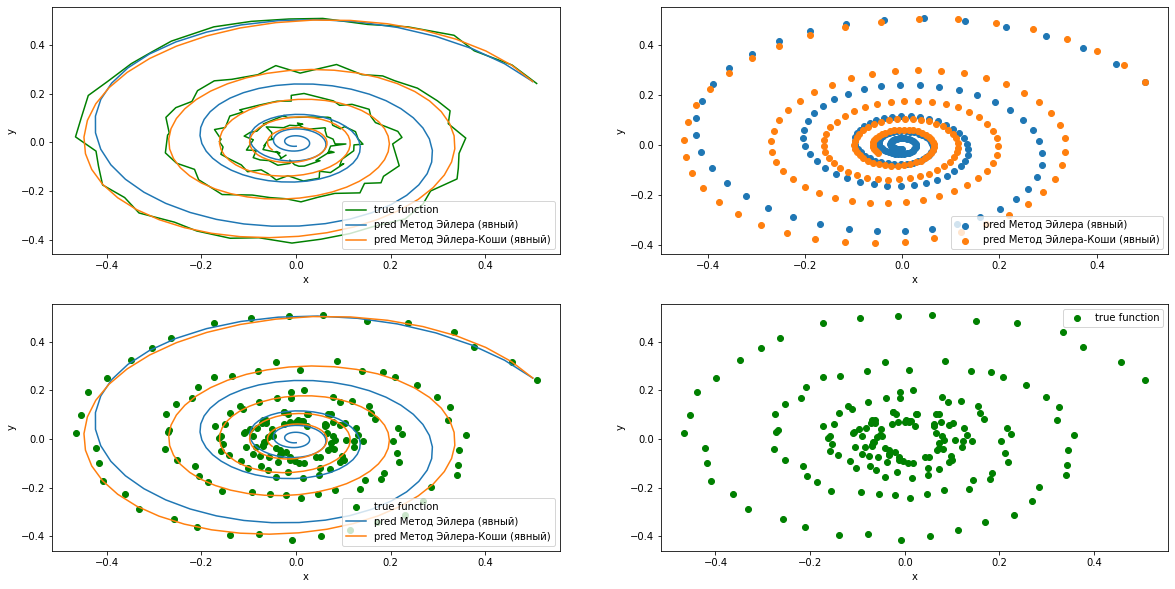

In [273]:
plot_loss(l_list_loss, mtds[:2])
plot_result_din_list(l_z0, l_time, l_l, l_values, l_run_din, mtds[:2])